In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
sampling_rate = 1024
nyquist_rate = sampling_rate / 2
filter_range = [20, 45]
transition_width = 0.1  # 10%

# The larger the order, the larger is the kernel
order = round(5 * sampling_rate / filter_range[0])  # 5 times of lower edge of range  (20)

# order must be odd for scipy.signal.firls to work
if order % 2 == 0: order += 1

"""
    1 ____ 1
0___0|    |0____0
"""
shape = [0, 0, 1, 1, 0, 0]  # shape of filter (above is the illustration)

# [ 0, 20*90%,  20, 
#  45, 45*110%, 512 ] 
filter_frequencies = [0, filter_range[0] * (1 - transition_width), filter_range[0],
                      filter_range[1], filter_range[1] * (1 + transition_width), nyquist_rate]
print('filter_frequencies: ', filter_frequencies)
filter_frequencies = np.asarray(filter_frequencies) / nyquist_rate  # making them as fractions of nyquist_rate
print('filter_frequencies sa fractions: ', filter_frequencies)


filter_frequencies:  [0, 18.0, 20, 45, 49.50000000000001, 512.0]
filter_frequencies sa fractions:  [0.         0.03515625 0.0390625  0.08789062 0.09667969 1.        ]


c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


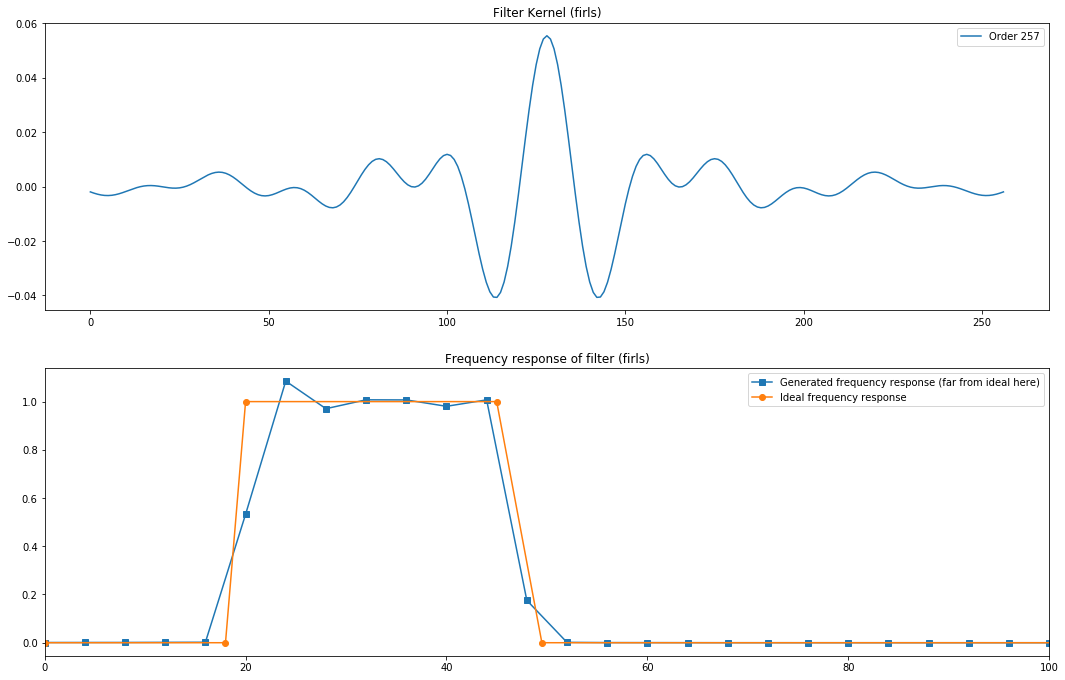

In [4]:
filtering_kernel = signal.firls(order, filter_frequencies, shape)

filter_power = abs(np.fft.fft(filtering_kernel)) ** 2
hz_axis = np.linspace(0, nyquist_rate, np.floor(len(filtering_kernel) / 2) + 1)
filter_power = filter_power[:len(hz_axis)]

# Plotting
plt.figure(figsize=(18, 18))
plt.subplot(311)
plt.plot(filtering_kernel, label='Order {0}'.format(order))
plt.title('Filter Kernel (firls)')
plt.legend()

plt.subplot(312)
plt.plot(hz_axis, filter_power, 's-', label='Generated frequency response (far from ideal here)')
plt.plot(filter_frequencies * nyquist_rate, shape, 'o-', label='Ideal frequency response')
plt.xlim([0, 100])
plt.title('Frequency response of filter (firls)')
plt.legend()


# Effects of the filter kernel order

In [5]:
# EFFECTS OF THE FILTER KERNEL ORDER


# Range of orders
order_first = round(1 * sampling_rate / filter_range[0])
order_last = round(15 * sampling_rate / filter_range[0])

orders = np.linspace(order_first, order_last, 10)


<Figure size 1080x504 with 0 Axes>

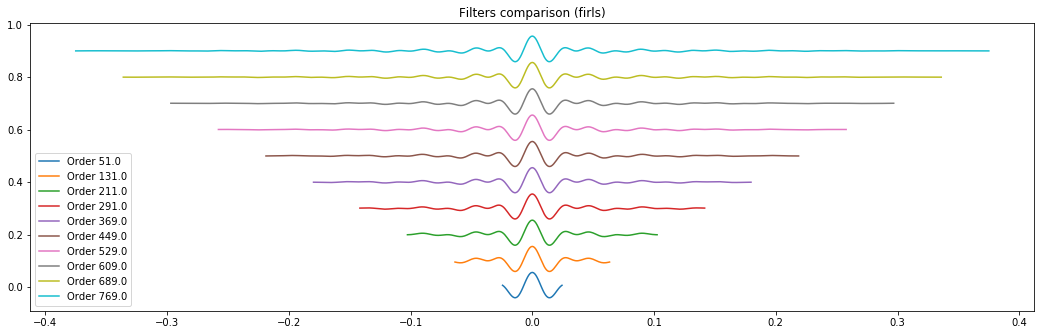

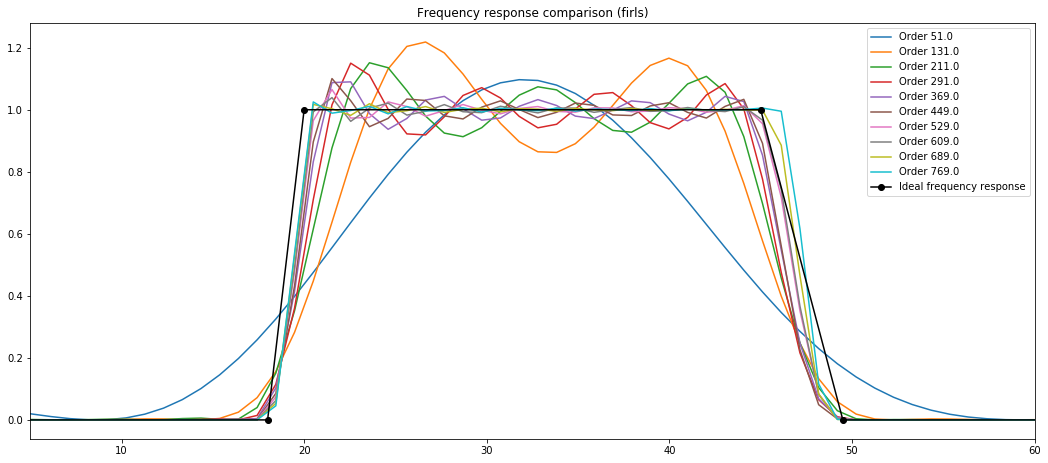

In [6]:
plt.figure(figsize=(15, 7))

filter_powers = np.zeros((len(orders), 1000))
hz_axis = np.linspace(0, sampling_rate, 1000)

plt.figure(figsize=(18, 18))
plt.subplot(311)
for i in range(len(orders)):
    # make sure order is odd-length
    order_to_use = orders[i] + (1 - orders[i] % 2)
    filtering_kernel_i = signal.firls(order_to_use, filter_frequencies, shape)

    filter_powers[i, :] = abs(np.fft.fft(filtering_kernel_i, 1000)) ** 2  # 1000 - size of array tot return
    time = np.arange(0, order_to_use) / sampling_rate
    time = time - np.mean(time)
    plt.plot(time, filtering_kernel_i + i * 0.1, label='Order {0}'.format(order_to_use))
plt.legend()
plt.title('Filters comparison (firls)')

plt.figure(figsize=(18, 26))
plt.subplot(312)
for i in range(len(orders)):
    order_to_use = orders[i] + (1 - orders[i] % 2)
    plt.plot(hz_axis, filter_powers[i], label='Order {0}'.format(order_to_use))
plt.plot(filter_frequencies * nyquist_rate, shape, 'ko-', label='Ideal frequency response')
plt.xlim([5, 60])
plt.title('Frequency response comparison (firls)')
plt.legend()


# Effects of the filter transition width

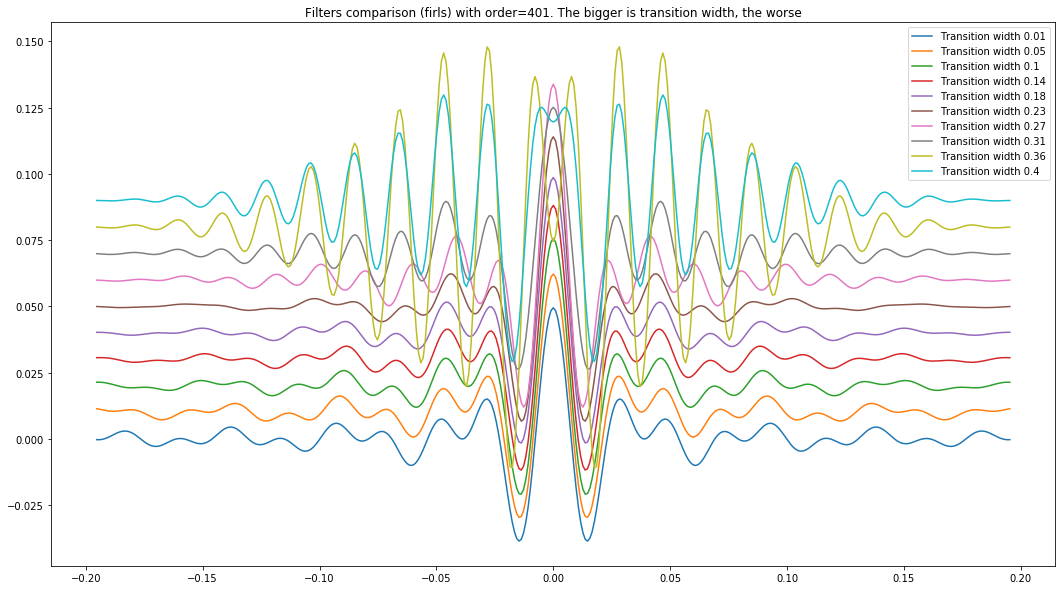

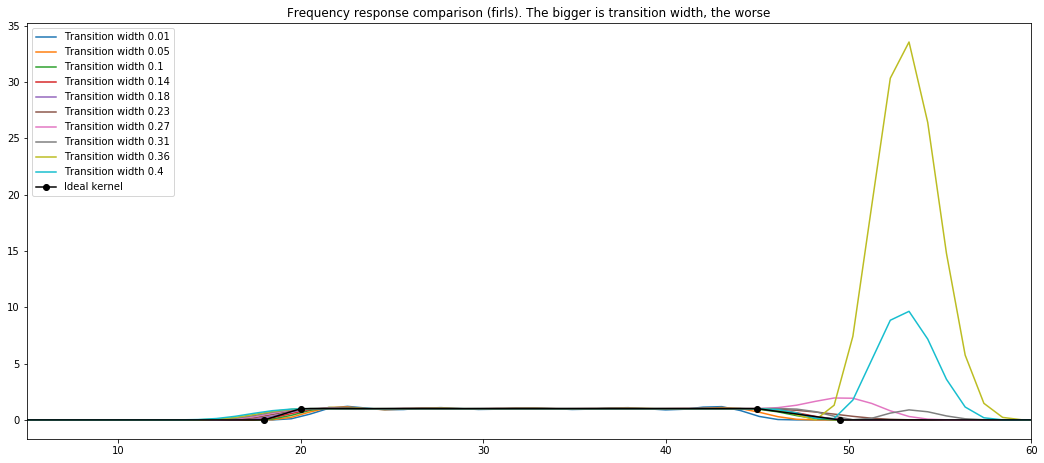

In [7]:
# EFFECTS OF THE FILTER TRANSITION WIDTH

# range of transitions
transition_widths = np.linspace(0.01, 0.4, 10)
filter_powers = np.zeros((len(transition_widths), 1000))
hz_axis = np.linspace(0, sampling_rate, 1000)
order = 401

plt.figure(figsize=(18, 10))

for i in range(len(transition_widths)):
    filter_frequencies_i = [0, filter_range[0] * (1 - transition_widths[i]), filter_range[0],
                            filter_range[1], filter_range[1] * (1 + transition_widths[i]), nyquist_rate]
    filter_frequencies_i = np.asarray(filter_frequencies_i) / nyquist_rate
    filtering_kernel_i = signal.firls(order, filter_frequencies_i, shape)

    filter_powers[i, :] = abs(np.fft.fft(filtering_kernel_i, 1000)) ** 2  # 1000 - size of array tot return
    time = np.arange(0, order) / sampling_rate
    time = time - np.mean(time)
    plt.plot(time, filtering_kernel_i + i * 0.01, label='Transition width {0}'.format(round(transition_widths[i], 2)))
plt.legend()
plt.title('Filters comparison (firls) with order={0}. The bigger is transition width, the worse'.format(order))

plt.figure(figsize=(18, 26))
plt.subplot(312)
for i in range(len(transition_widths)):
    plt.plot(hz_axis, filter_powers[i], label='Transition width {0}'.format(round(transition_widths[i], 2)))
plt.plot(filter_frequencies * nyquist_rate, shape, 'ko-', label='Ideal kernel')
plt.xlim([5, 60])
plt.title('Frequency response comparison (firls). The bigger is transition width, the worse')
plt.legend()

